<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_mandiri_10__1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

#Latihan 1

###Input Data Manual & Data Preprocessing

In [ ]:
data1 = {
    'Suhu': [10, 25, 15, 20, 18, 20, 22, 24],
    'Angin': [0, 0, 5, 3, 7, 10, 5, 6],
    'persepsi': ['Dingin','Panas', 'Dingin','Panas', 'Dingin', 'Dingin', 'Panas', 'Panas']
}
df = pd.DataFrame(data1)

In [ ]:
df.head()

,Suhu,Angin,persepsi
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin


Tentukan X dan Y data

In [ ]:
X_data = df[['Suhu', 'Angin']].values
y_data = df['persepsi'].values

In [ ]:

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42
)

Ubah menjadi numerik

In [ ]:
replacements = {'persepsi': {'Dingin': 0, 'Panas': 1}}
df = df.replace(replacements, inplace=False)
df.head()

,Suhu,Angin,persepsi
0,10,0,0
1,25,0,1
2,15,5,0
3,20,3,1
4,18,7,0


In [ ]:
k_values = range(1, 6)
akurasi = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    akurasi.append(accuracy_score(y_test, y_pred))

for k, acc in zip(k_values, akurasi):
    print(f"k = {k}: akurasi = {acc}")

k = 1: akurasi = 1.0
k = 2: akurasi = 1.0
k = 3: akurasi = 0.6666666666666666
k = 4: akurasi = 0.6666666666666666
k = 5: akurasi = 0.3333333333333333


In [ ]:
k_terbaik = k_values[akurasi.index(max(akurasi))]
print("Nilai k terbaik:", k_terbaik)


Nilai k terbaik: 1


In [ ]:
model = KNeighborsClassifier(n_neighbors=k_terbaik)
model.fit(X_data, y_data)

data_baru = [[16, 3]]
prediksi = model.predict(data_baru)

if prediksi[0] == 1:
    print("Persepsi Marry: Panas")
else:
    print("Persepsi Marry: Dingin")

Persepsi Marry: Dingin


#latihan 2

In [ ]:
data2 = {
    'Nim': ['TI001', 'TI002', 'TI003', 'TI004', 'TI005',
            'TI006', 'TI007','TI008','TI009', 'TI010'],
    'Aktual': ['Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
               'Tidak Lulus','Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus'],
    'Prediksi': ['Lulus', 'Lulus', 'Lulus', 'Tidak Lulus','Tidak Lulus', 'Lulus',
                 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']
}
df = pd.DataFrame(data2)
df.head()

,Nim,Aktual,Prediksi
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus


In [ ]:
# Ubah label menjadi numerik

replacements = {'Aktual': {'Tidak Lulus': 0, 'Lulus': 1},
                'Prediksi': {'Tidak Lulus': 0, 'Lulus': 1}}
df = df.replace(replacements, inplace=False)
df.head()

/tmp/ipython-input-3877836131.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(replacements, inplace=False)


,Nim,Aktual,Prediksi
0,TI001,1,1
1,TI002,1,1
2,TI003,1,1
3,TI004,1,0
4,TI005,1,0


In [ ]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

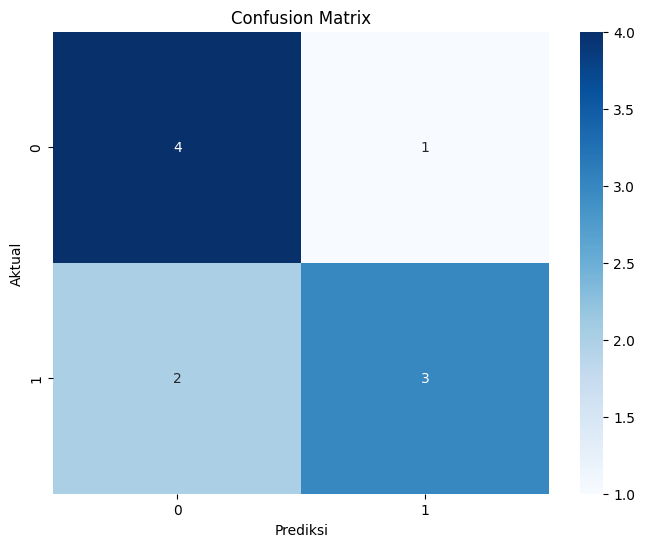

In [ ]:
cm = confusion_matrix(df['Aktual'], df['Prediksi'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [ ]:
print("\nClasification Report:")
print(classification_report(df['Aktual'], df['Prediksi']))


Clasification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10

